import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
my_data= pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
my_data.dropna(inplace=True)
my_data

,umur,gender,tipe sakit dada,resting bp s,kolesterol,gula darah puasa,resting ecg,denyut jantung maksimal,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
my_data.info

<bound method DataFrame.info of       umur  gender  tipe sakit dada  resting bp s  kolesterol  \
0       40       1                2           140         289   
1       49       0                3           160         180   
2       37       1                2           130         283   
3       48       0                4           138         214   
4       54       1                3           150         195   
...    ...     ...              ...           ...         ...   
1185    45       1                1           110         264   
1186    68       1                4           144         193   
1187    57       1                4           130         131   
1188    57       0                2           130         236   
1189    38       1                3           138         175   

      gula darah puasa  resting ecg  denyut jantung maksimal  exercise angina  \
0                    0            0                      172                0   
1                    0            0                      156                0   
2                    0            1                       98                0   
3                    0            0                      108                1   
4                    0            0                      122                0   
...                ...          ...                      ...              ...   
1185                 0            0                      132                0   
1186                 1            0                      141                0   
1187                 0            0                      115                1   
1188                 0            2                      174                0   
1189                 0            0                      173                0   

      oldpeak  ST slope  target  
0         0.0         1       0  
1         1.0         2       1  
2         0.0         1       0  
3         1.5         2       1  
4         0.0         1       0  
...       ...       ...     ...  
1185      1.2         2       1  
1186      3.4         2       1  
1187      1.2         2       1  
1188      0.0         2       1  
1189      0.0         1       0  

[1190 rows x 12 columns]>

<Axes: >

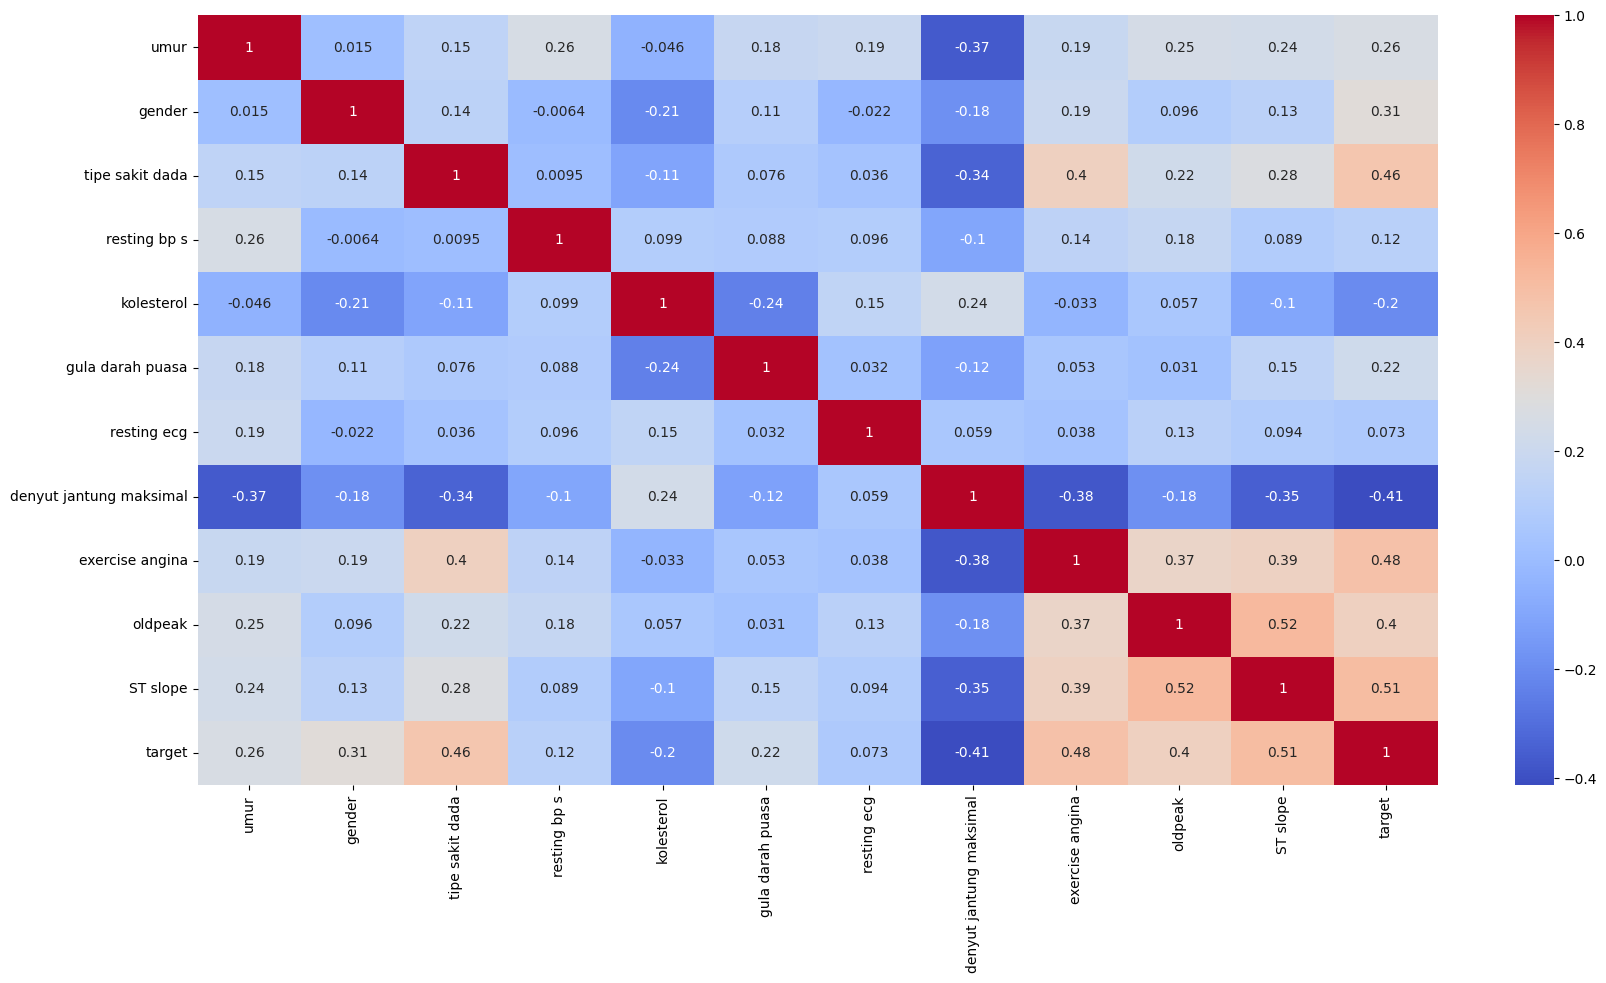

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(my_data.corr(),annot=True,cmap="coolwarm")

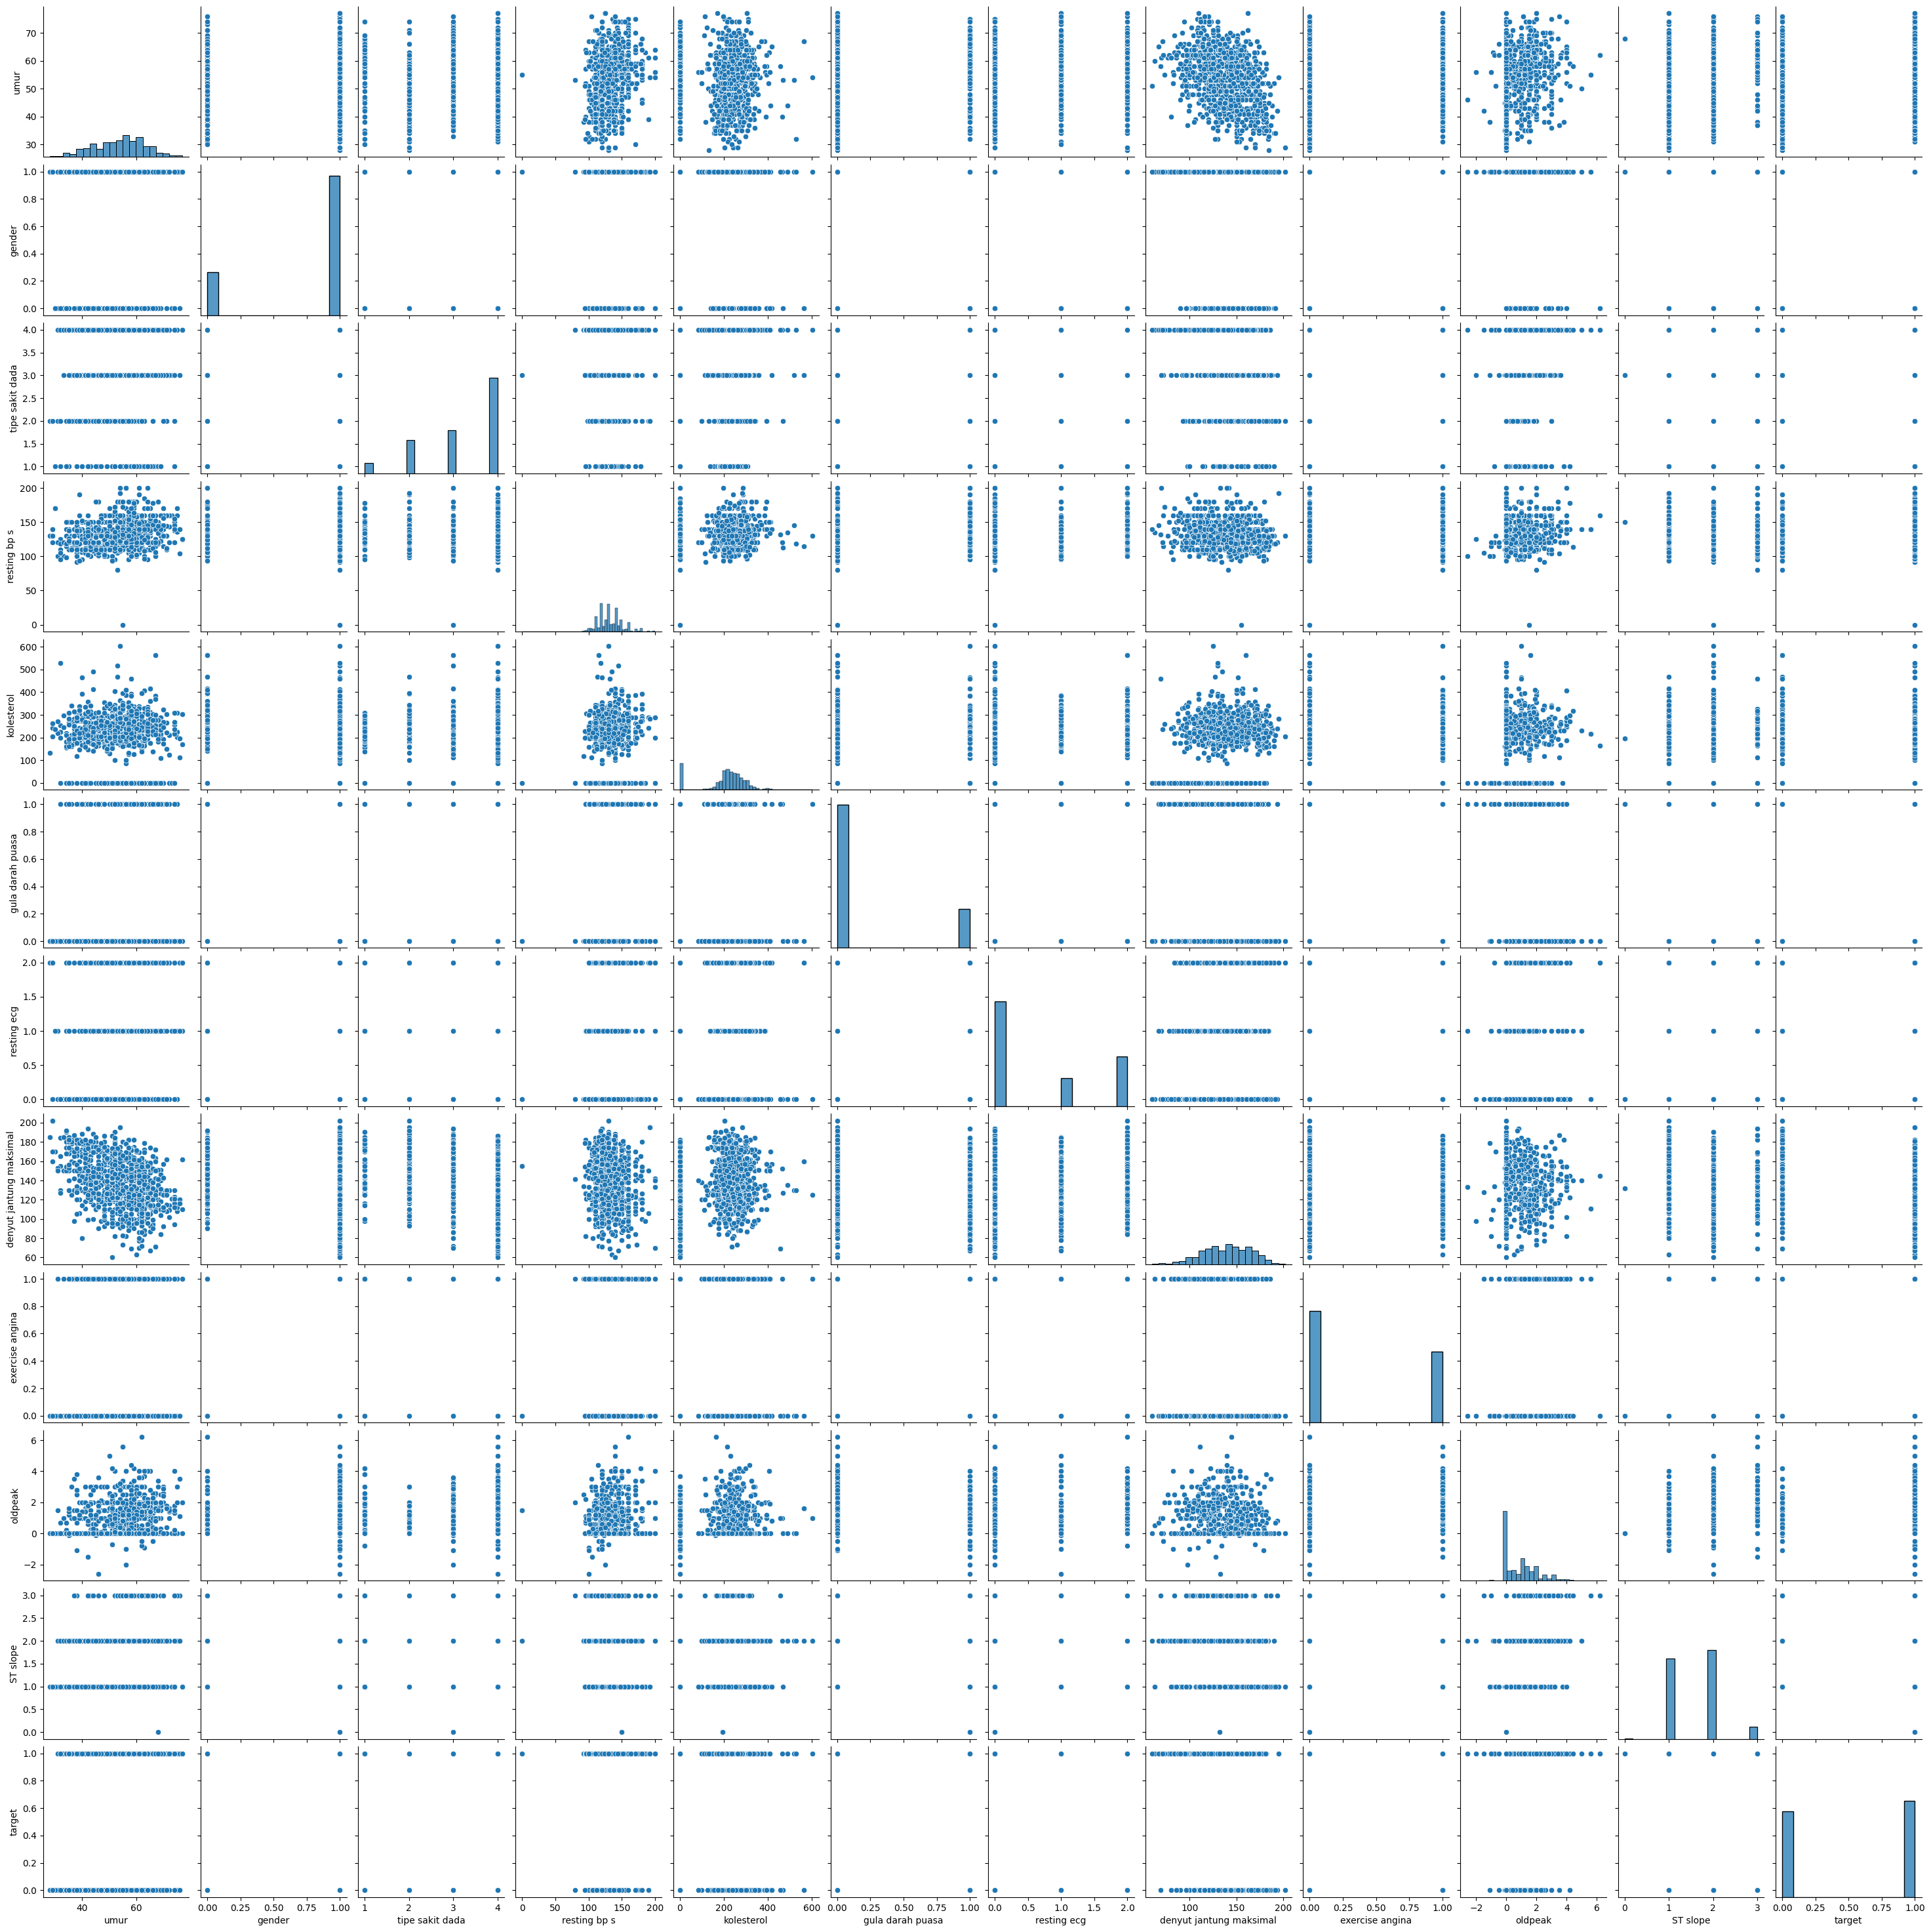

In [ ]:
sns.pairplot(my_data)
plt.show()

array([[<Axes: title={'center': 'umur'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'tipe sakit dada'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'kolesterol'}>,
        <Axes: title={'center': 'gula darah puasa'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'denyut jantung maksimal'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

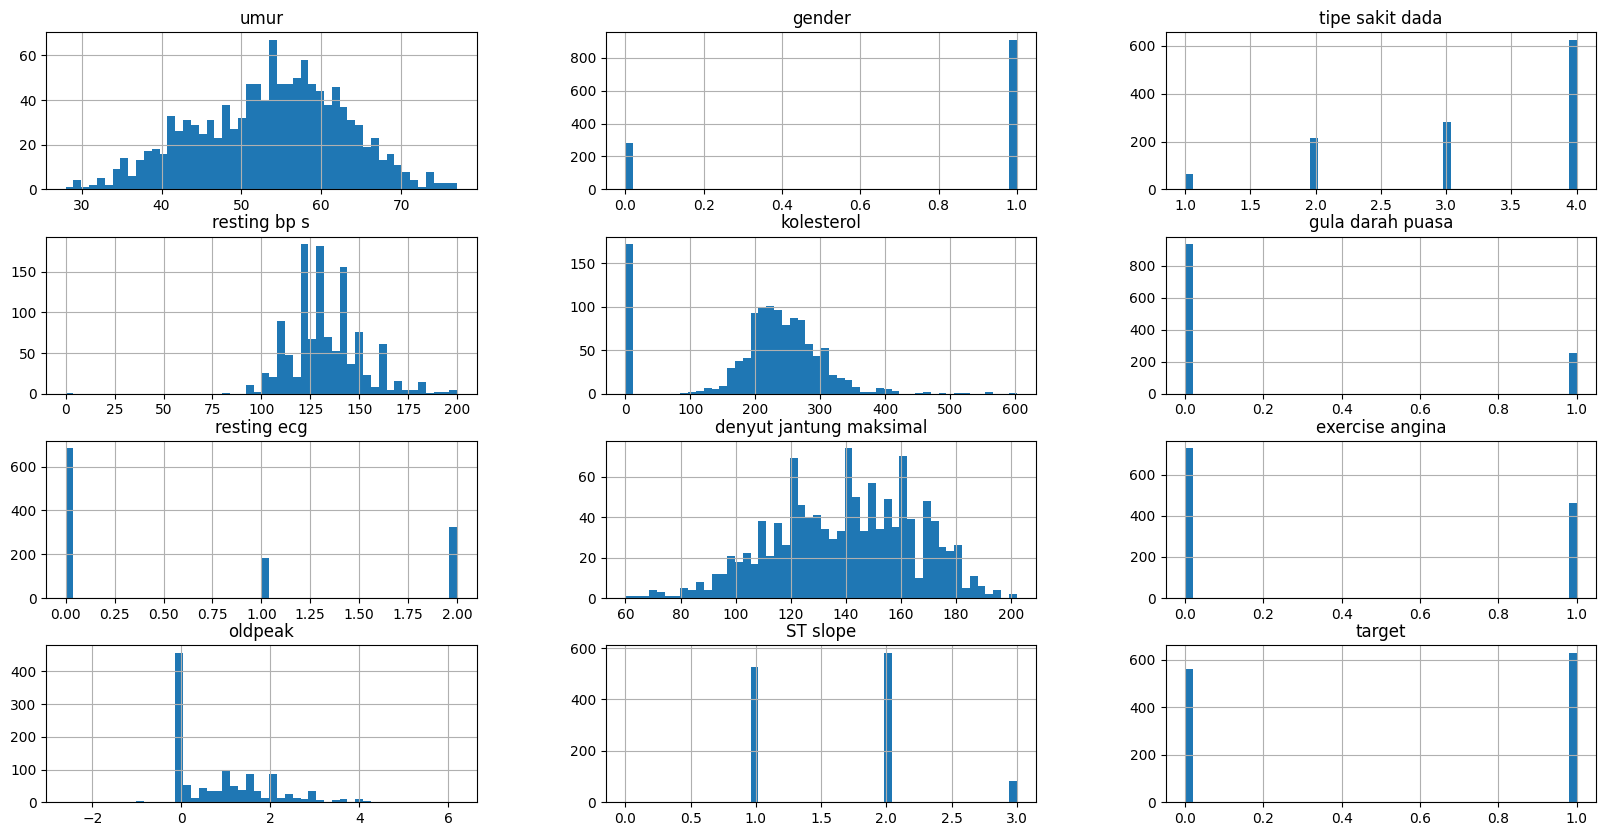

In [ ]:
my_data.hist(figsize=(20,10),bins = 50)

In [ ]:
X=my_data.drop(["target"],axis=1)
X

,umur,gender,tipe sakit dada,resting bp s,kolesterol,gula darah puasa,resting ecg,denyut jantung maksimal,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [ ]:
y=my_data["target"]
y=pd.DataFrame(y)
y

,target
0,0
1,1
2,0
3,1
4,0
...,...
1185,1
1186,1
1187,1
1188,1


In [ ]:
#Standard Scaler for Data
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)
X

array([[-1.46672783,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-0.50460037, -1.79857595, -0.24893198, ..., -0.79521891,
         0.07111913,  0.61558278],
       [-1.78743698,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       ...,
       [ 0.35062404,  0.55599543,  0.82048698, ...,  1.25751537,
         0.25530143,  0.61558278],
       [ 0.35062404, -1.79857595, -1.31835093, ..., -0.79521891,
        -0.84979236,  0.61558278],
       [-1.68053393,  0.55599543, -0.24893198, ..., -0.79521891,
        -0.84979236, -1.02321701]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle =True)

In [ ]:
#Applying RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=300,random_state=33) #criterion can be also : entropy
RandomForestClassifierModel.fit(X_train, y_train)


#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred)
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred)

#----------------------------------------------------

prediction=RandomForestClassifierModel.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# drawing confusion matrix
# sns.heatmap(CM, center = True)
# plt.show()
print("accuracy:",metrics.accuracy_score(y_test,prediction))

<ipython-input-12-6005cc25d99e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestClassifierModel.fit(X_train, y_train)


RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  0.9608938547486033
RandomForestClassifierModel features importances are :  [0.09782564 0.03856438 0.14416081 0.08278857 0.10795441 0.02139774
 0.02720902 0.12873186 0.06737376 0.11809657 0.16589724]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1
 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1]
Prediction Probabilities Value for RandomForestClassifierModel is :  [1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1
 1 0 0 1 1 1 0 0